In [1]:
import geohash
from datetime import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import utm
import gc
import numpy as np

sns.set_style("darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
this_dir = os.path.abspath('')

In [3]:
data_path = os.path.join(this_dir, "training.csv")

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB


In [7]:
# day: value indicates the sequential order and not a particular day of the month
# day is unsacified dates where its interval is around 2 months [1, 61 days] 
# timestamp: start time of 15-minute intervals, in the following format: <hour>:<minute>, 
# where hour ranges from 0 to 23 and minute is either one of (0, 15, 30, 45)
data.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [6]:
data['time'] = pd.to_datetime(data['timestamp'], format = '%H:%M').dt.time

In [9]:
data['time'][5]

datetime.time(12, 15)

In [7]:
data.head(10)

,geohash6,day,timestamp,demand,time
0,qp03wc,18,20:0,0.020072,20:00:00
1,qp03pn,10,14:30,0.024721,14:30:00
2,qp09sw,9,6:15,0.102821,06:15:00
3,qp0991,32,5:0,0.088755,05:00:00
4,qp090q,15,4:0,0.074468,04:00:00
5,qp03tu,1,12:15,0.023843,12:15:00
6,qp096d,25,3:30,0.007460,03:30:00
7,qp03nr,51,20:45,0.000293,20:45:00
8,qp093r,48,6:15,0.054170,06:15:00
9,qp03r2,4,22:15,0.123463,22:15:00


In [11]:
# data_lat_long = data.copy()

In [12]:
# data_lat_long['latitude longtitude'] = data_lat_long['geohash6'].apply(lambda x: geohash.decode(x)[0:2])

In [13]:
# data_lat_long['longitude'] = data_lat_long['geohash6'].apply(lambda x: geohash.decode(x)[1])

In [14]:
# data_lat_long.head()

In [15]:
# tmp = data[(data['geohash6'] == 'qp03wc') | (data['geohash6'] == 'qp03pn') | (data['geohash6'] == 'qp09sw') | (data['geohash6'] == 'qp090q') |
#           (data['geohash6'] == 'qp091u') | (data['geohash6'] == 'qp09kb') | (data['geohash6'] == 'qp093r') | (data['geohash6'] == 'qp03r2') ]

In [16]:
# sns.lineplot(x='time', y='demand', data=tmp[0:500000][tmp['day']<=45], hue = 'geohash6')

In [17]:
# utm.from_latlon(-5.353088,90.653687)

In [18]:
# data_lat_long['x'] = data_lat_long['latitude longtitude'].apply(lambda x:utm.from_latlon(x[0],x[1])[0])
# data_lat_long['y'] = data_lat_long['latitude longtitude'].apply(lambda x:utm.from_latlon(x[0],x[1])[1])

In [19]:
# data_lat_long.drop(['timestamp'], axis = 1 , inplace=True)

In [20]:
# data_lat_long.head()

In [21]:
# unique_places = pd.DataFrame()
# unique_places['x_coor'] = data_lat_long['x'].unique().tolist()
# unique_places['y_coor'] = data_lat_long['y'].unique().tolist()
# unique_places['geohash6'] = data_lat_long['geohash6'].unique().tolist()
# tmp2 = unique_places[(unique_places['geohash6'] == 'qp03wc') | (unique_places['geohash6'] == 'qp03r2') |
#                      (unique_places['geohash6'] == 'qp09sw') | (unique_places['geohash6'] == 'qp091u') |
#                     (unique_places['geohash6'] == 'qp09sw')]

In [22]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(data=tmp2, x='x_coor', y='y_coor', hue= 'geohash6')

In [23]:
# data_lat_long['label_demand'] = data_lat_long['demand'].apply(lambda x: 'low' if 0.0 <= x <= 0.4 else ('medium' if 0.4 < x <= 0.7 else 'high'))

In [24]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(data=data_lat_long[0:100000][data_lat_long['day']<=1], x='x', y='y', hue= 'label_demand')

In [25]:
cp_data = data[['geohash6', 'day', 'time','demand']].copy()

In [26]:
cp_data.head()

,geohash6,day,time,demand
0,qp03wc,18,20:00:00,0.020072
1,qp03pn,10,14:30:00,0.024721
2,qp09sw,9,06:15:00,0.102821
3,qp0991,32,05:00:00,0.088755
4,qp090q,15,04:00:00,0.074468


In [27]:
def merge_datetime(x, y):
    res = dt.combine(x, y)
#     print(res)
    return res

In [28]:
cp_data['date'] = pd.to_datetime(cp_data['day']-1, unit= 'D', origin=pd.Timestamp('2019-01')).dt.date

In [29]:
cp_data.head(20)

,geohash6,day,time,demand,date
0,qp03wc,18,20:00:00,0.020072,2019-01-18
1,qp03pn,10,14:30:00,0.024721,2019-01-10
2,qp09sw,9,06:15:00,0.102821,2019-01-09
3,qp0991,32,05:00:00,0.088755,2019-02-01
4,qp090q,15,04:00:00,0.074468,2019-01-15
5,qp03tu,1,12:15:00,0.023843,2019-01-01
6,qp096d,25,03:30:00,0.007460,2019-01-25
7,qp03nr,51,20:45:00,0.000293,2019-02-20
8,qp093r,48,06:15:00,0.054170,2019-02-17
9,qp03r2,4,22:15:00,0.123463,2019-01-04


In [30]:
cp_data[cp_data['day']==7].head(3)

,geohash6,day,time,demand,date
48,qp09k0,7,11:15:00,0.057708,2019-01-07
84,qp09sz,7,12:30:00,0.176106,2019-01-07
123,qp09t9,7,23:15:00,0.005486,2019-01-07


In [30]:
# cp_data['week_day'] = cp_data['date'].apply(lambda x: x.weekday())

In [31]:
cp_data['week_day'] = cp_data['day'].apply(lambda x: x%7)

In [32]:
cp_data.head()

,geohash6,day,time,demand,date,week_day
0,qp03wc,18,20:00:00,0.020072,2019-01-18,4
1,qp03pn,10,14:30:00,0.024721,2019-01-10,3
2,qp09sw,9,06:15:00,0.102821,2019-01-09,2
3,qp0991,32,05:00:00,0.088755,2019-02-01,4
4,qp090q,15,04:00:00,0.074468,2019-01-15,1


In [33]:
cp_data['date_time'] = cp_data.apply(lambda row: merge_datetime(row['date'], row['time']), axis=1)

In [34]:
cp_data.head()

,geohash6,day,time,demand,date,week_day,date_time
0,qp03wc,18,20:00:00,0.020072,2019-01-18,4,2019-01-18 20:00:00
1,qp03pn,10,14:30:00,0.024721,2019-01-10,3,2019-01-10 14:30:00
2,qp09sw,9,06:15:00,0.102821,2019-01-09,2,2019-01-09 06:15:00
3,qp0991,32,05:00:00,0.088755,2019-02-01,4,2019-02-01 05:00:00
4,qp090q,15,04:00:00,0.074468,2019-01-15,1,2019-01-15 04:00:00


In [35]:
32%7

4

In [36]:
demand_data = cp_data.drop(['day', 'time', 'date'], axis=1).set_index('date_time')

In [37]:
demand_data.head(20)

,geohash6,demand,week_day
date_time,,,
2019-01-18 20:00:00,qp03wc,0.020072,4
2019-01-10 14:30:00,qp03pn,0.024721,3
2019-01-09 06:15:00,qp09sw,0.102821,2
2019-02-01 05:00:00,qp0991,0.088755,4
2019-01-15 04:00:00,qp090q,0.074468,1
2019-01-01 12:15:00,qp03tu,0.023843,1
2019-01-25 03:30:00,qp096d,0.007460,4
2019-02-20 20:45:00,qp03nr,0.000293,2
2019-02-17 06:15:00,qp093r,0.054170,6


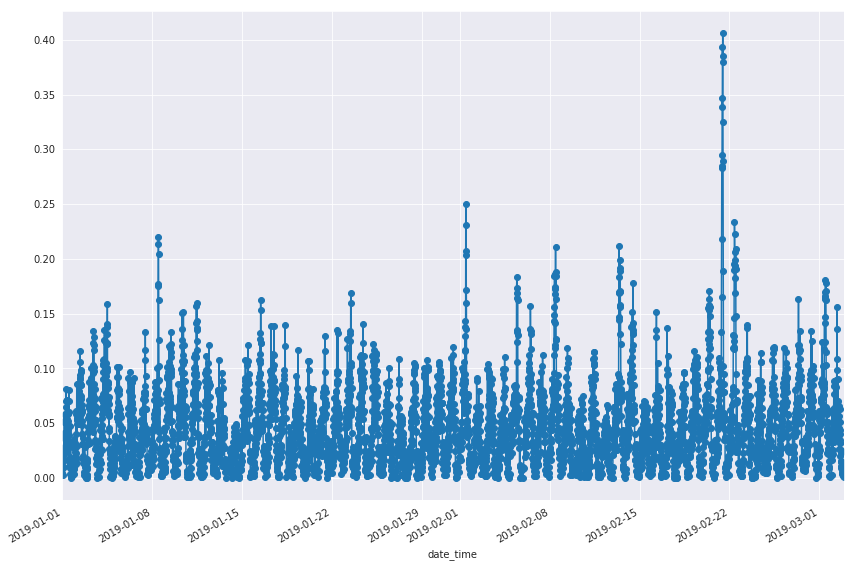

In [38]:
plt.figure(figsize=(14,10))
demand_data[demand_data['geohash6']=='qp03qq']['demand'].plot(marker='o')

In [39]:
demand_data['lat_long'] = demand_data['geohash6'].apply(lambda x: geohash.decode(x)[0:2])

In [40]:
demand_data.head()

,geohash6,demand,week_day,lat_long
date_time,,,,
2019-01-18 20:00:00,qp03wc,0.020072,4,"(-5.35308837890625, 90.6536865234375)"
2019-01-10 14:30:00,qp03pn,0.024721,3,"(-5.41351318359375, 90.6646728515625)"
2019-01-09 06:15:00,qp09sw,0.102821,2,"(-5.32562255859375, 90.9063720703125)"
2019-02-01 05:00:00,qp0991,0.088755,4,"(-5.35308837890625, 90.7525634765625)"
2019-01-15 04:00:00,qp090q,0.074468,1,"(-5.41351318359375, 90.7196044921875)"


In [41]:
# demand_data[(demand_data.index>='2019-02-28') & (demand_data.index<'2019-03-01')]

In [42]:
# analysed_data_in_61_day = pd.pivot_table(cp_data, values = ['demand'],
#                               index=['geohash6'], aggfunc= np.mean)

In [43]:
# analysed_data_in_61_day = analysed_data_in_61_day.reset_index()

In [44]:
# analysed_data_in_61_day['latitude longtitude'] = analysed_data_in_61_day['geohash6'].apply(lambda x: geohash.decode(x)[0:2])

In [45]:
# analysed_data_in_61_day['x'] = analysed_data_in_61_day['latitude longtitude'].apply(lambda x:utm.from_latlon(x[0],x[1])[0])
# analysed_data_in_61_day['y'] = analysed_data_in_61_day['latitude longtitude'].apply(lambda x:utm.from_latlon(x[0],x[1])[1])

In [46]:
# analysed_data_in_61_day['label_demand'] = analysed_data_in_61_day['demand'].apply(lambda x: 'low' if 0.0 <= x <= 0.3 else ('medium' if 0.3 < x <= 0.6 else 'high'))

In [47]:
# analysed_data_in_61_day.head()

In [48]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(data=analysed_data_in_61_day, x='x', y='y', hue= 'label_demand')

In [49]:
cp_data.head()

,geohash6,day,time,demand,date,week_day,date_time
0,qp03wc,18,20:00:00,0.020072,2019-01-18,4,2019-01-18 20:00:00
1,qp03pn,10,14:30:00,0.024721,2019-01-10,3,2019-01-10 14:30:00
2,qp09sw,9,06:15:00,0.102821,2019-01-09,2,2019-01-09 06:15:00
3,qp0991,32,05:00:00,0.088755,2019-02-01,4,2019-02-01 05:00:00
4,qp090q,15,04:00:00,0.074468,2019-01-15,1,2019-01-15 04:00:00


In [50]:
data_pivot = pd.pivot_table(data, index=['geohash6'], columns=['time'], aggfunc={'demand': np.mean}) 

In [51]:
data_pivot.head(12)

demand                                                    \
time      00:00:00  00:15:00  00:30:00  00:45:00  01:00:00  01:15:00   
geohash6                                                               
qp02yc    0.023538  0.014121       NaN  0.008998  0.018331  0.029215   
qp02yf    0.005461       NaN       NaN  0.011670  0.028495  0.000857   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.015022  0.075394  0.105400  0.026455  0.009722  0.017138   
qp02yz         NaN  0.009603  0.017409  0.027712  0.011939  0.015769   
qp02z1    0.027933  0.037779  0.034807  0.046257  0.047124  0.044641   
qp02z3    0.002528  0.031988  0.028502  0.025162  0.029413  0.013426   
qp02z4    0.009215  0.000506  0.014226  0.021335  0.017392  0.025280   
qp02z5    0.012886  0.010852  0.014885  0.014383  0.030483  0.013799   
qp02z6    0.018495  0.015559  0.022066  0.013984  0.016971  0.028253   
qp02z7    0.035897  0.029969  0.022536  0.028397  0.031947  0.040772   

                                                                      \
time      01:30:00  01:45:00  02:00:00  02:15:00  02:30:00  02:45:00   
geohash6                                                               
qp02yc    0.009092  0.012366  0.025879  0.027261  0.014447  0.043239   
qp02yf    0.014195       NaN       NaN  0.006581  0.048453  0.001744   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.022856  0.005974  0.015606       NaN  0.012698  0.004444   
qp02yz    0.007975  0.015568  0.049685  0.042634  0.029243  0.026256   
qp02z1    0.062152  0.070304  0.056079  0.056377  0.065272  0.052567   
qp02z3    0.014894  0.015305  0.023729  0.026468  0.015190  0.031488   
qp02z4    0.019933  0.019301  0.016258  0.014975  0.017448  0.010035   
qp02z5    0.012818  0.013532  0.027887  0.016414  0.026191  0.010794   
qp02z6    0.022489  0.021752  0.026393  0.029302  0.027437  0.033954   
qp02z7    0.042708  0.048330  0.057571  0.062632  0.060871  0.083994   

                                                                      \
time      03:00:00  03:15:00  03:30:00  03:45:00  04:00:00  04:15:00   
geohash6                                                               
qp02yc    0.053204  0.025251  0.020124  0.015409  0.025136  0.024712   
qp02yf    0.018043       NaN  0.009584  0.018338  0.007171  0.009008   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.011209       NaN  0.014353  0.017106  0.044985  0.027209   
qp02yz    0.023353  0.044786  0.032534  0.028084  0.040802  0.037967   
qp02z1    0.044217  0.052579  0.046435  0.041790  0.026124  0.035810   
qp02z3    0.021036  0.022845  0.019319  0.027800  0.037899  0.027563   
qp02z4    0.023952  0.014899  0.016174  0.016611  0.031886  0.019503   
qp02z5    0.036158  0.015938  0.028185  0.011704  0.017565  0.025603   
qp02z6    0.046050  0.041052  0.040151  0.042965  0.055820  0.045632   
qp02z7    0.090300  0.104353  0.102427  0.090000  0.085587  0.089492   

                                                                      \
time      04:30:00  04:45:00  05:00:00  05:15:00  05:30:00  05:45:00   
geohash6                                                               
qp02yc    0.022289  0.028914  0.023302  0.018600  0.023815  0.028944   
qp02yf         NaN  0.003717  0.004820  0.005326       NaN  0.013982   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN  0.047163  0.199402       NaN       NaN   
qp02yy    0.010479  0.011736  0.009879  0.010167  0.021859  0.013663   
qp02yz    0.033183  0.038315  0.049792  0.042981  0.032139  0.033538   
qp02z1    0.032468  0.024975  0.031892  0.023714  0.027107  0.022153   
qp02z3    0.040784  0.021307  0.030215  0.021446 

In [52]:
tmp = pd.pivot_table(data, index=['geohash6'], columns=['day'], aggfunc={'demand': np.mean})

In [53]:
tmp.head()

demand                                                    \
day             1         2         3         4         5         6    
geohash6                                                               
qp02yc    0.009958  0.023302  0.017957  0.022404  0.017801  0.017009   
qp02yf         NaN  0.015191  0.012648  0.004679  0.004869  0.011172   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN  0.023521       NaN   
qp02yy    0.011518  0.065576  0.006532  0.015832  0.006650  0.021777   

                                                                      \
day             7         8         9         10        11        12   
geohash6                                                               
qp02yc    0.023427  0.022695  0.020403  0.011812  0.021321  0.011891   
qp02yf    0.008924       NaN  0.003324  0.008150  0.007159  0.008528   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.006165  0.005612  0.016502       NaN       NaN  0.014809   

                                                                               \
day             13        14        15        16       17        18        19   
geohash6                                                                        
qp02yc    0.017688  0.014222  0.028967  0.025602  0.01667  0.016554  0.037205   
qp02yf    0.016740       NaN       NaN  0.011446      NaN       NaN       NaN   
qp02yu         NaN       NaN       NaN       NaN      NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN      NaN       NaN       NaN   
qp02yy    0.012058       NaN  0.021531  0.007941      NaN  0.011678       NaN   

                                                                      \
day             20        21        22        23        24        25   
geohash6                                                               
qp02yc    0.011718  0.025028  0.010284  0.031521  0.024117  0.007728   
qp02yf    0.038553       NaN       NaN  0.013982       NaN  0.014182   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN  0.123283       NaN   
qp02yy    0.009866       NaN  0.012348  0.006350  0.012247  0.016414   

                                                                      \
day             26        27        28        29        30        31   
geohash6                                                               
qp02yc    0.006762  0.032456  0.023828  0.017057  0.045742  0.011507   
qp02yf    0.002880  0.044299       NaN       NaN       NaN       NaN   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv    0.010649       NaN       NaN       NaN       NaN  0.147559   
qp02yy    0.022085  0.002488  0.032029       NaN  0.088866  0.010070   

                                                                      \
day             32        33        34        35        36        37   
geohash6                                                               
qp02yc    0.015961  0.031223  0.020559  0.028339  0.036954  0.027563   
qp02yf         NaN       NaN       NaN       NaN       NaN  0.005310   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.015834  0.028068       NaN  0.008734  0.011259       NaN   

                                                                      \
day             38        39        40        41        42        43   
geohash6                                                               
qp02yc    0.017479  0.056936  0.017957  0.013847  0.018390  0.018517   
qp02yf         NaN  0.010337  0.019241       NaN  0.007171  0.006808   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       N

In [54]:
tmp2 = pd.pivot_table(data, index=['geohash6'], columns=['time'], aggfunc={'demand': np.mean})

In [55]:
tmp2.head()

demand                                                             \
time      00:00:00  00:15:00 00:30:00  00:45:00  01:00:00  01:15:00  01:30:00   
geohash6                                                                        
qp02yc    0.023538  0.014121      NaN  0.008998  0.018331  0.029215  0.009092   
qp02yf    0.005461       NaN      NaN  0.011670  0.028495  0.000857  0.014195   
qp02yu         NaN       NaN      NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN      NaN       NaN       NaN       NaN       NaN   
qp02yy    0.015022  0.075394   0.1054  0.026455  0.009722  0.017138  0.022856   

                                                                      \
time      01:45:00  02:00:00  02:15:00  02:30:00  02:45:00  03:00:00   
geohash6                                                               
qp02yc    0.012366  0.025879  0.027261  0.014447  0.043239  0.053204   
qp02yf         NaN       NaN  0.006581  0.048453  0.001744  0.018043   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.005974  0.015606       NaN  0.012698  0.004444  0.011209   

                                                                      \
time      03:15:00  03:30:00  03:45:00  04:00:00  04:15:00  04:30:00   
geohash6                                                               
qp02yc    0.025251  0.020124  0.015409  0.025136  0.024712  0.022289   
qp02yf         NaN  0.009584  0.018338  0.007171  0.009008       NaN   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy         NaN  0.014353  0.017106  0.044985  0.027209  0.010479   

                                                                      \
time      04:45:00  05:00:00  05:15:00  05:30:00  05:45:00  06:00:00   
geohash6                                                               
qp02yc    0.028914  0.023302  0.018600  0.023815  0.028944  0.024351   
qp02yf    0.003717  0.004820  0.005326       NaN  0.013982       NaN   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN  0.047163  0.199402       NaN       NaN  0.023521   
qp02yy    0.011736  0.009879  0.010167  0.021859  0.013663  0.022743   

                                                                      \
time      06:15:00  06:30:00  06:45:00  07:00:00  07:15:00  07:30:00   
geohash6                                                               
qp02yc    0.027162  0.020020  0.022412  0.025895  0.017357  0.013636   
qp02yf         NaN       NaN       NaN  0.010985  0.001133  0.022350   
qp02yu         NaN       NaN       NaN       NaN       NaN  0.002570   
qp02yv         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yy    0.008988  0.012646  0.015692  0.014717  0.005004  0.024503   

                                                                      \
time      07:45:00  08:00:00  08:15:00  08:30:00  08:45:00  09:00:00   
geohash6                                                               
qp02yc    0.024068  0.022317  0.030844  0.014057  0.023312  0.027053   
qp02yf    0.018191  0.007697  0.009430  0.028106  0.013928  0.015962   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN  0.142536  0.152582  0.011164       NaN   
qp02yy    0.012563  0.010779  0.009901  0.006732  0.006002  0.003453   

                                                                      \
time      09:15:00  09:30:00  09:45:00  10:00:00  10:15:00  10:30:00   
geohash6                                                               
qp02yc    0.027193  0.026449  0.023308  0.022639  0.019635  0.025543   
qp02yf    0.050709  0.044299  0.018812  0.028760  0.022577  0.014996   
qp02yu         NaN       NaN       NaN       NaN       NaN       NaN   
qp02yv         NaN       NaN       NaN       N

### Autocorrelation plot

In [50]:
data.head()

,geohash6,day,timestamp,demand,time
0,qp03wc,18,20:0,0.020072,20:00:00
1,qp03pn,10,14:30,0.024721,14:30:00
2,qp09sw,9,6:15,0.102821,06:15:00
3,qp0991,32,5:0,0.088755,05:00:00
4,qp090q,15,4:0,0.074468,04:00:00


In [91]:
del tmp
gc.collect()

21

In [92]:
tmp = data[['day','time', 'geohash6', 'demand']].copy()
tmp = tmp.sort_values(by = ['geohash6', 'day','time'])
tmp = tmp.reset_index(drop=True)

In [93]:
lag = [2,3,4,5,111]
for i in lag:
    tmp["moving_%d" % i] =  tmp.groupby('geohash6')['demand'].transform(lambda x: x.rolling(i).mean())
    print(i)

2
3
4
5
111


In [94]:
tmp = tmp.fillna(0)

In [54]:
tmp.head()

,day,time,geohash6,demand,moving_90,moving_100,moving_120,moving_140,moving_160,moving_180,moving_200,moving_220,moving_240
0,1,02:45:00,qp02yc,0.020592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,03:00:00,qp02yc,0.010292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,04:00:00,qp02yc,0.006676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,04:30:00,qp02yc,0.003822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,06:45:00,qp02yc,0.011131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from pandas.plotting import autocorrelation_plot

In [60]:
# data.groupby('geohash6')['day'].nunique()

In [214]:
plot_df = tmp[tmp['geohash6'] == 'qp0djs']

In [215]:
plot_df = plot_df.drop(['day', 'time', 'geohash6'], axis=1)

In [95]:
tmp.corr()

,day,demand,moving_2,moving_3,moving_4,moving_5,moving_111
day,1.000000,0.023643,0.023971,0.024234,0.024476,0.024707,0.054766
demand,0.023643,1.000000,0.994050,0.989133,0.984737,0.980463,0.825009
moving_2,0.023971,0.994050,1.000000,0.997251,0.993752,0.990052,0.831437
moving_3,0.024234,0.989133,0.997251,1.000000,0.998268,0.995543,0.835742
moving_4,0.024476,0.984737,0.993752,0.998268,1.000000,0.998741,0.839383
moving_5,0.024707,0.980463,0.990052,0.995543,0.998741,1.000000,0.842718
moving_111,0.054766,0.825009,0.831437,0.835742,0.839383,0.842718,1.000000


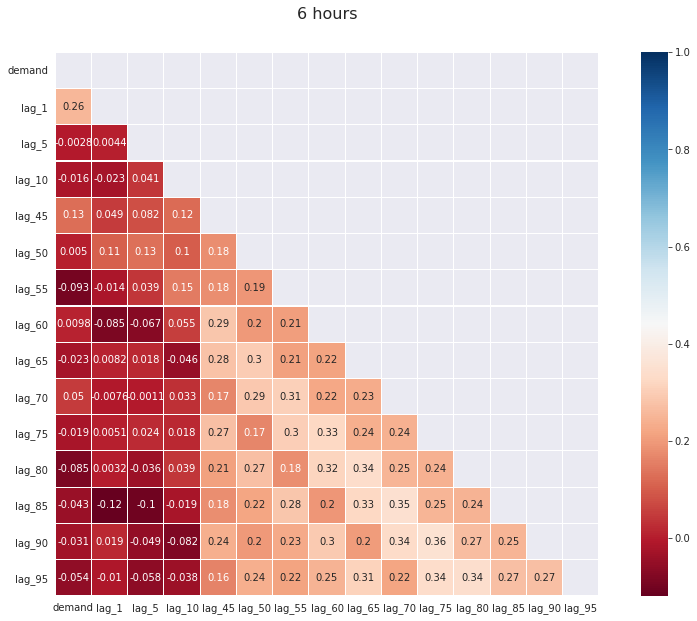

In [198]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'6 hours', y=1.05, size=16)

mask = np.zeros_like(plot_df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(plot_df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)